[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте DataFrame  добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [1]:
import requests
from tqdm.auto import tqdm
import pandas as pd

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [3]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':sber,
    'page':page,
    'per_page':num_per_page
    #'area':moscow,
}
res = requests.get(url, params=params)

In [6]:
res.json()

{'items': [{'id': '68704654',
   'premium': False,
   'name': 'Стажер Data scientist',
   'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'Кутузовский проспект',
    'building': '32к1',
    'description': None,
    'lat': 55.741338,
    'lng': 37.531127,
    'raw': 'Москва, Кутузовский проспект, 32к1',
    'metro': {'station_name': 'Кутузовская',
     'line_name': 'Филевская',
     'station_id': '4.73',
     'line_id': '4',
     'lat': 55.740544,
     'lng': 37.5341},
    'metro_stations': [{'station_name': 'Кутузовская',
      'line_name': 'Филевская',
      'station_id': '4.73',
      'line_id': '4',
      'lat': 55.740544,
      'lng': 37.5341},
     {'station_name': 'Кутузовская',
      'line_name': 'МЦК',
      'station_id':

In [4]:
res = requests.get(url)

In [5]:
print(res)

<Response [200]>


In [ ]:
# res.json()

In [7]:

vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

100

In [8]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [8]:
vacancies.get('items')[0]

{'id': '69593460',
 'premium': False,
 'name': 'Менеджер по продажам',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': None, 'to': 350000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2022-09-07T19:28:51+0300',
 'created_at': '2022-09-07T19:28:51+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=69593460',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/69593460?host=hh.ru',
 'adv_response_url': 'https://api.hh.ru/vacancies/69593460/adv_response?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/69593460',
 'relations': [],
 'employer': {'id': '2489728',
  'name': 'Банкирро',
  'url': 'https://api.hh.ru/employers/2489728',
  'alternate_url': 'https://hh.ru/employer/248

In [9]:
v = vacancies.get('items')

In [10]:
len(v)

20

In [11]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [41]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [13]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [11]:
vnum  =100 #vacancies.get('pages')

In [12]:
vnum


100

In [13]:
import datetime as dt
from datetime import timedelta
from datetime import date

In [64]:
print(dt.datetime.now().date())#.replace(hour=0))

2022-09-07


In [14]:
all_vacancy_ids= []
stop=dt.datetime.now().date()
start=stop+timedelta(-33)
end=start+timedelta(1)
while  (start<=stop):
 for i in tqdm(range(vnum)):
  url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&date_from={start}&date_to={end}' #&area={moscow}'
  res = requests.get(url)
  if str(res)!='<Response [200]>': break
  vacancies = res.json()
  vacancy_ids = [el.get('id') for el in vacancies.get('items')]
  f=vacancies.get('found')
  #print(str(f))
  if i>f/100: break
  if f==0: break
  all_vacancy_ids.extend(vacancy_ids)
  #print(str(f)+':'+str(i)+'  '+str(start)+'-'+str(end))
# print(str(start)+'-'+str(end)+':'+str(f)+'|'+str(res)+'|'+str(i)+'|'+ str(len(all_vacancy_ids)))
 start=start+timedelta(1)
 end=end+timedelta(1)
    # print(str(res)+'|'+str(i)+'|'+ str(len(all_vacancy_ids)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

9141

In [16]:
all_vacancy_ids_un=list(set(all_vacancy_ids))

In [17]:
len(all_vacancy_ids_un)

4572

In [50]:
all_vacancy_ids[1]

'68619472'

In [18]:
vacs = []
for vac_id in tqdm(all_vacancy_ids_un):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
   # if str(res)=='<Response [200]>':
    vacs.append(res.json())

  0%|          | 0/4572 [00:00<?, ?it/s]

In [19]:
len(vacs)

4572

In [55]:
res = requests.get(url)

In [56]:
res.json().keys()

dict_keys(['errors', 'request_id'])

In [20]:
res.json().get('key_skills')

In [ ]:
[{'name':'SQL'},{'name':'Python'},{'name':'Git'}]

In [ ]:
[x.get('name') for x in [{'name':'SQL'},{'name':'Python'},{'name':'Git'}]]

['SQL', 'Python', 'Git']

In [73]:
vacs[0]

{'id': '68385641',
 'premium': True,
 'billing_type': {'id': 'premium', 'name': 'Премиум'},
 'relations': [],
 'name': 'Старший менеджер по обслуживанию',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '4184',
  'name': 'Русский Акташ',
  'url': 'https://api.hh.ru/areas/4184'},
 'salary': {'from': 31000, 'to': None, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'direct', 'name': 'Рекламная'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'part', 'name': 'Частичная занятость'},
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'contacts': None,
 'description': '<p>Сбер — это 14 тысяч подразделений и лучший работодатель России по версии hh.</p> <p> </p> <p>Старшие менеджеры по обслуживанию в Сбере – это специалисты, которые проводят операции клиентов в кассе: помогают обменивать деньги, п

In [21]:
df = pd.json_normalize(vacs)

In [22]:
len(df)

4572

In [23]:
df['published_at'][0]

'2022-08-24T10:22:22+0300'

In [24]:
df['published_at'] = pd.to_datetime(df['published_at'])

In [25]:
df['published_at']

0      2022-08-24 10:22:22+03:00
1      2022-09-08 09:06:39+03:00
2      2022-08-20 16:25:04+03:00
3      2022-08-17 11:31:41+03:00
4      2022-09-02 10:14:35+03:00
                  ...           
4567                         NaT
4568                         NaT
4569                         NaT
4570                         NaT
4571                         NaT
Name: published_at, Length: 4572, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [26]:
import matplotlib.pyplot as plt

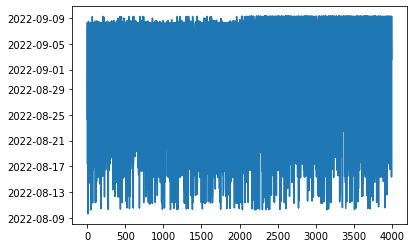

In [27]:
df['published_at'].plot()

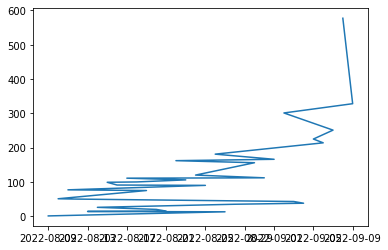

In [28]:
plt.plot(df['published_at'].dt.date.value_counts())

In [29]:
df['published_at'] = df['published_at'].dt.dayofweek

In [232]:
#в четверг публикуется больше всего вакансий, в остальные дни примерно одинаково. Так как сегодня четверг :). Надо было по дате создания смотреть
df['published_at'].value_counts()

3.0    906
2.0    537
1.0    519
0.0    518
4.0    483
6.0     96
5.0     79
Name: published_at, dtype: int64

In [30]:
#получается, что в основном первоначальная публикация осуществляется в понедельник. Затем четверг, вторник, пятница, среда.
df['initial_created_at'] = pd.to_datetime(df['initial_created_at'])
df['initial_created_at'] = df['initial_created_at'].dt.dayofweek
df['initial_created_at'].value_counts()

0.0    988
3.0    851
1.0    767
4.0    700
2.0    658
6.0     29
5.0      5
Name: initial_created_at, dtype: int64

In [31]:
df['name'].value_counts()

Старший клиентский менеджер                                365
Старший менеджер по обслуживанию                           364
Клиентский менеджер прямых продаж                          170
Менеджер по работе с ключевыми клиентами малого бизнеса     64
Клиентский менеджер Сбербанк Премьер                        42
                                                          ... 
Junior Java Developer, Data Engineer                         1
Tech Lead (System analysis)                                  1
Водитель-инкассатор (мастер)                                 1
Старший клиентский менеджер (рп. Сосновское)                 1
Старший\Ведущий инженер по сопровождению                     1
Name: name, Length: 1931, dtype: int64

In [32]:
df.columns

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'salary', 'address', 'allow_messages',
       'contacts', 'description', 'branded_description',
       'vacancy_constructor_template', 'key_skills', 'accept_handicapped',
       'accept_kids', 'archived', 'response_url', 'specializations',
       'professional_roles', 'code', 'hidden', 'quick_responses_allowed',
       'driver_license_types', 'accept_incomplete_resumes', 'published_at',
       'created_at', 'initial_created_at', 'negotiations_url',
       'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test',
       'alternate_url', 'working_days', 'working_time_intervals',
       'working_time_modes', 'accept_temporary', 'languages',
       'billing_type.id', 'billing_type.name', 'area.id', 'area.name',
       'area.url', 'type.id', 'type.name', 'experience.id', 'experience.name',
       'schedule.id', 'schedule.name', 'employment.id', 'employment.name',
       'department.

In [33]:
df['area.name'].value_counts()

Москва                        1014
Санкт-Петербург                137
Нижний Новгород                 96
Самара                          92
Екатеринбург                    83
                              ... 
Большой Камень                   1
Приволжск                        1
Смоленское                       1
Петрозаводск                     1
Магнитка (Кусинский район)       1
Name: area.name, Length: 864, dtype: int64

In [34]:
c=[]
risk=[]
ad=[]
adpyt=[]
id=[]
pyt=[]
i=0
risk=df[(df['name'].str.lower().str.find('риск')>-1) & (df['name'].str.lower().str.find('операцио')>-1)]
id=df[(df['name'].str.lower().str.find('директор')>-1) ]
ad=df[((df['name'].str.lower().str.find('аналитик')>-1) & (df['name'].str.lower().str.find('данных')>-1))|((df['name'].str.lower().str.find('data')>-1) & (df['name'].str.lower().str.find('analist')>-1))]
risk['name'].value_counts()

Аналитик по операционным рискам    1
Методолог (операционные риски)     1
Name: name, dtype: int64

In [35]:
id['name'].value_counts()

Директор проектов разработки и реализации стратегии «Финансовый бизнес»                       1
Директор по продажам B2B-продуктов                                                            1
Директор проектов/программ (Биометрия)                                                        1
Операционный директор Контактный центр ПАО Сбербанк в г. Волгоград (Красноармейский район)    1
Директор проектов управления организационного развития                                        1
Директор проектов по внедрению лучших практик управления активами на фондовом рынке           1
Name: name, dtype: int64

In [36]:
ad['name'].value_counts()

Аналитик данных                                                   6
Аналитик в отдел качества данных                                  1
Аналитик данных Интеллектуальная система управления               1
Менеджер-аналитик данных                                          1
Риск-аналитик/Аналитик данных (SQL)                               1
Аудитор - аналитик данных                                         1
Системный аналитик (хранилище данных)                             1
Аналитик данных в команду Интеллектуального IVR (Data Analyst)    1
Аналитик данных \ Data Analyst (ценообразование)                  1
Аналитик данных (SQL)                                             1
Аналитик данных в Дивизион Интеллектуальная Система Управления    1
Аналитик по качеству данных                                       1
Name: name, dtype: int64

In [37]:
# 17 вакансий Аналитика данных
len(ad)

17

In [38]:
ad.head()

,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,contacts,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,test.required,errors,request_id
73,69289629,False,[],Аналитик данных,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,68795217,False,[],Аналитик в отдел качества данных,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,69271120,False,[],Аналитик данных Интеллектуальная система управ...,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,69338633,False,[],Менеджер-аналитик данных,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,68650456,False,[],Риск-аналитик/Аналитик данных (SQL),NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ad[['name','key_skills','description']]

,name,key_skills,description
73,Аналитик данных,[],<p><strong>Обязанности</strong></p> <ul> <li>П...
221,Аналитик в отдел качества данных,[],<p><strong>Обязанности</strong></p> <p> </p> <...
517,Аналитик данных Интеллектуальная система управ...,[],<p><strong>Обязанности</strong></p> <p>DA/AI-с...
552,Менеджер-аналитик данных,[],<p><strong>Наша команда</strong></p> <p>Цель н...
714,Риск-аналитик/Аналитик данных (SQL),[],<p><strong>Обязанности</strong></p> <ul> <li>М...
1200,Аудитор - аналитик данных,[],<p><strong>Обязанности</strong></p> <p>Участие...
1410,Системный аналитик (хранилище данных),"[{'name': 'SQL'}, {'name': 'Hadoop'}, {'name':...","<p>На данный момент, в связи с расширением про..."
1757,Аналитик данных,"[{'name': 'Статистический анализ'}, {'name': '...","<p>Сбер — больше чем банк, это динамично разви..."
1877,Аналитик данных,[],<h3><strong>Обязанности:</strong></h3> <ul> <l...
1914,Аналитик данных в команду Интеллектуального IV...,[],<p>Команда Интеллектуального IVR работает над ...


In [66]:
ss=ad['key_skills'] #.get('name') #.to_dict()

In [67]:
ss

73                                                     []
221                                                    []
517                                                    []
552                                                    []
714                                                    []
1200                                                   []
1410    [{'name': 'SQL'}, {'name': 'Hadoop'}, {'name':...
1757    [{'name': 'Статистический анализ'}, {'name': '...
1877                                                   []
1914                                                   []
2033                                                   []
2353    [{'name': 'SQL'}, {'name': 'Teradata'}, {'name...
2761                                                   []
3125                                                   []
3354                                                   []
3648    [{'name': 'Работа в команде'}, {'name': 'Умени...
3778                                                   []
Name: key_skil

In [68]:
q=[]
for i in ss.keys():
  if len(ss[i])> 0: 
    q.append(ss[i])
    print(len(ss[i]))

5
8
3
5


In [69]:
type(q)

list

In [70]:
q

[[{'name': 'SQL'},
  {'name': 'Hadoop'},
  {'name': 'Hive'},
  {'name': 'Системный анализ'},
  {'name': 'Spark'}],
 [{'name': 'Статистический анализ'},
  {'name': 'Qlik Sense'},
  {'name': 'Математическая статистика'},
  {'name': 'SQL'},
  {'name': 'Python'},
  {'name': 'Анализ данных'},
  {'name': 'Аналитическое мышление'},
  {'name': 'Английский язык'}],
 [{'name': 'SQL'}, {'name': 'Teradata'}, {'name': 'Python'}],
 [{'name': 'Работа в команде'},
  {'name': 'Умение работать в команде'},
  {'name': 'Умение работать в коллективе'},
  {'name': 'Способность обучать других'},
  {'name': 'Материальная ответственность'}]]

In [71]:
i=0
j=0
w=[]
#w=pd.DataFrame() 

In [72]:
while i<len(q):
  while j<len(q[i]):
    w.append(q[i][j].get('name'))
  #  print(q[i][j])
    j+=1
  j=0
  i+=1

In [76]:
len(w)

21

In [126]:
z=pd.DataFrame({'Skill':[], 'count':[]})

In [130]:
z

,Skill,count
0,SQL,3.0
1,Hadoop,1.0
2,Hive,1.0
3,Системный анализ,1.0
4,Spark,1.0
5,Статистический анализ,1.0
6,Qlik Sense,1.0
7,Математическая статистика,1.0
8,SQL,3.0
9,Python,2.0


In [129]:
i=0 
while i<len(w):
  new_row={'Skill':w[i],'count':w.count(w[i])}
  z=z.append(new_row, ignore_index=True)
 # print(w[i]+''+str(w.count(w[i])))
  i+=1

In [132]:
type(z)

pandas.core.frame.DataFrame

In [137]:
zz=z.drop_duplicates().sort_values('count',ascending=False)

In [138]:
zz

,Skill,count
0,SQL,3.0
9,Python,2.0
11,Аналитическое мышление,1.0
19,Способность обучать других,1.0
18,Умение работать в коллективе,1.0
17,Умение работать в команде,1.0
16,Работа в команде,1.0
14,Teradata,1.0
12,Английский язык,1.0
10,Анализ данных,1.0


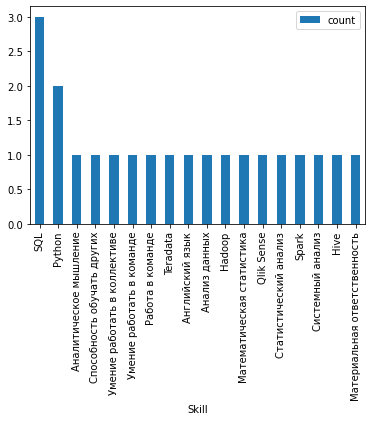

In [149]:
#на этой маленькой выборке самые востребованные навыки для Аналитика данных - SQL и Python
zz.plot.bar(x='Skill', y='count')